# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [3]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
139,OSMAR
32,MARCIO
33,NATALIA
21,VERA
157,JAIME


# Incluindo ID dos alunos

In [7]:
import numpy as np

In [8]:
np.random.seed(123)

In [9]:
total_alunos = len(nomes)
total_alunos

400

In [10]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [11]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [13]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br


In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br


# Criando a tabela cursos

In [16]:
!pip3 install html5lib
!pip3 install lxml

In [17]:
import html5lib

In [18]:
url = 'C:\\Users\\F5440952\\Projetos Python\\tabela-cursos.csv'

In [19]:
cursos = pd.read_csv(url)

In [20]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [21]:
type(cursos)

pandas.core.frame.DataFrame

# Alterando index de cursos

In [22]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})

In [23]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [24]:
cursos['id'] = cursos.index + 1

In [25]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [26]:
cursos = cursos.set_index('id')

In [27]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


In [29]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)

In [30]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,2
64,ROBSON,290,@dominiodoemail.com.br,robson@dominiodoemail.com.br,2
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,3


In [31]:
nomes.matriculas.describe()

count    400.000000
mean       1.565000
std        0.918086
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: matriculas, dtype: float64

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

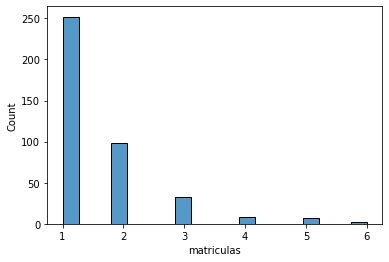

In [33]:
sns.histplot(nomes.matriculas)

In [34]:
nomes.matriculas.value_counts()

1    252
2     98
3     33
4      8
5      7
6      2
Name: matriculas, dtype: int64

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,1
169,JOELMA,394,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,1
148,APARECIDO,332,@dominiodoemail.com.br,aparecido@dominiodoemail.com.br,2
24,CLAUDIA,16,@servicodoemail.com,claudia@servicodoemail.com,3
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,1


# Selecionando cursos

In [36]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [37]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [38]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17


In [39]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [40]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
140,NILSON,361,@servicodoemail.com,nilson@servicodoemail.com,1
8,LUIZ,208,@servicodoemail.com,luiz@servicodoemail.com,5
85,FABRICIO,59,@dominiodoemail.com.br,fabricio@dominiodoemail.com.br,2


In [41]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [42]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17


In [43]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
3,14,C# para Web
4,15,Ruby on Rails
5,16,Cursos de Python


# Saída em diferentes formatos

In [44]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
3,14,C# para Web
4,15,Ruby on Rails
5,16,Cursos de Python


In [45]:
matriculas_por_curso.to_csv('C:\\Users\\F5440952\\Projetos Python\\matriculas_por_curso.csv', index = False)

In [46]:
pd.read_csv('C:\\Users\\F5440952\\Projetos Python\\matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,2,Lógica de programação
1,5,Java para Web
2,14,C# para Web
3,15,Ruby on Rails
4,16,Cursos de Python
5,52,PHP com MySql
6,52,.NET para web
7,36,Novas integrações com Java
8,36,TDD com Java
9,17,Código limpo com C#


In [47]:
matriculas_json = matriculas_por_curso.to_json()

In [48]:
matriculas_json

'{"quantidade_de_alunos":{"1":2,"2":5,"3":14,"4":15,"5":16,"6":52,"7":52,"8":36,"9":36,"10":17,"11":14,"12":36,"13":69,"14":59,"15":49,"16":50,"17":6,"18":68,"19":12,"20":18},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [49]:
matriculas_html = matriculas_por_curso.to_html()

In [50]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>5</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>14</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>15</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>16</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>52</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>52</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>36</td>\n      <td>Novas integrações com Java</td>\n  

In [51]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>14</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>15</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>16</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>52</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>52</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>36</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>36</td>
  

# Criando o banco SQL

In [52]:
!pip install sqlalchemy

In [53]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [54]:
engine = create_engine('sqlite:///:memory:')

In [55]:
engine

Engine(sqlite:///:memory:)

In [56]:
type(engine)

sqlalchemy.engine.base.Engine

In [57]:
matriculas_por_curso.to_sql('matriculas', engine)

In [58]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco SQL

In [59]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [60]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,2,Lógica de programação
1,2,5,Java para Web
2,3,14,C# para Web
3,4,15,Ruby on Rails
4,5,16,Cursos de Python
5,10,17,Código limpo com C#
6,11,14,Preparatório para certificação Java
7,17,6,Internet das coisas
8,19,12,Boas práticas em Java
9,20,18,Orientação objetos com Java


In [61]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,2
1,Java para Web,5
2,C# para Web,14
3,Ruby on Rails,15
4,Cursos de Python,16
5,PHP com MySql,52
6,.NET para web,52
7,Novas integrações com Java,36
8,TDD com Java,36
9,Código limpo com C#,17


In [62]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,2
1,Java para Web,5
2,C# para Web,14
3,Ruby on Rails,15
4,Cursos de Python,16
5,PHP com MySql,52
6,.NET para web,52
7,Novas integrações com Java,36
8,TDD com Java,36
9,Código limpo com C#,17


In [63]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
12,Persistência com .NET,69
17,Programação funcional,68


# Escrevendo no banco

In [64]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [65]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\F5440952\AppData\Local\Temp/ipykernel_26084/1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# nomes dos alunos e alunas da proxima turma

In [67]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
3,14,C# para Web
4,15,Ruby on Rails
5,16,Cursos de Python
6,52,PHP com MySql
7,52,.NET para web
8,36,Novas integrações com Java
9,36,TDD com Java


In [68]:
matriculas

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17
...,...,...
621,323,6
622,383,12
623,383,18
624,366,18


In [69]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
6,343,16
12,379,16
36,287,16
37,80,16
49,328,16
51,103,16
66,296,16
69,268,16
76,158,16
98,303,16


In [70]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
6,PEDRO,67,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,1
41,DANIELA,296,@servicodoemail.com,daniela@servicodoemail.com,3
48,RENATO,384,@servicodoemail.com,renato@servicodoemail.com,2


In [71]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
19,16,VALMIR,@dominiodoemail.com.br,valmir@dominiodoemail.com.br,2
28,16,REINALDO,@servicodoemail.com,reinaldo@servicodoemail.com,1
32,16,SARA,@dominiodoemail.com.br,sara@dominiodoemail.com.br,1
54,16,MARGARIDA,@dominiodoemail.com.br,margarida@dominiodoemail.com.br,4
80,16,VITORIA,@servicodoemail.com,vitoria@servicodoemail.com,2
83,16,ISABEL,@dominiodoemail.com.br,isabel@dominiodoemail.com.br,3
91,16,LORENA,@servicodoemail.com,lorena@servicodoemail.com,1
98,16,JEFERSON,@servicodoemail.com,jeferson@servicodoemail.com,2
103,16,JOSEFA,@servicodoemail.com,josefa@servicodoemail.com,2


In [72]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
19        VALMIR
28      REINALDO
32          SARA
54     MARGARIDA
80       VITORIA
83        ISABEL
91        LORENA
98      JEFERSON
103       JOSEFA
106        LIVIA
106        LIVIA
110      OSVALDO
113       FELIPE
124        ERICK
127      JONATAN
134       GILSON
139       SERGIO
158    TEREZINHA
188    ALEXANDRE
190        IRENE
206        ITALO
210        JULIO
228        ERICA
230       CARLOS
230       CARLOS
254    CLAUDINEI
268      MARLENE
269       MURILO
273        ALICE
287         VERA
292       ANDREA
296      DANIELA
303       DAIANE
315      ALISSON
317    ALEXANDRA
322       MARCIO
328       RENATA
339       THIAGO
341    ALEXANDRO
343      ADRIANA
348       DANILO
356      RONALDO
360        ELIAS
373      EMERSON
379     PATRICIA
382    FRANCISCO
386       YASMIN
394       JOELMA
397       LILIAN
398     CRISTIAN
Name: nome, dtype: object

In [74]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
19,VALMIR
28,REINALDO
32,SARA
54,MARGARIDA
80,VITORIA
83,ISABEL
91,LORENA
98,JEFERSON
103,JOSEFA


In [75]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [76]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [77]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [79]:
proxima_turma = proxima_turma.rename(columns = {'nome':'alunos do curso de {}'.format(nome_curso)})

In [80]:
proxima_turma

,alunos do curso de Estatística básica
id_aluno,
19,VALMIR
28,REINALDO
32,SARA
54,MARGARIDA
80,VITORIA
83,ISABEL
91,LORENA
98,JEFERSON
103,JOSEFA


# Exportando para Excel

In [81]:
proxima_turma.to_excel('C:\\Users\\F5440952\\Projetos Python\\proxima_turma.xlsx', index=False)

In [82]:
pd.read_excel('C:\\Users\\F5440952\\Projetos Python\\proxima_turma.xlsx')

,alunos do curso de Estatística básica
0,VALMIR
1,REINALDO
2,SARA
3,MARGARIDA
4,VITORIA
5,ISABEL
6,LORENA
7,JEFERSON
8,JOSEFA
9,LIVIA
